In [1]:
import tensorflow as tf

In [2]:
a = tf.constant([1, 2, 3, 1, 1])
b = tf.constant([0, 1, 3, 4, 5])

In [3]:
tf.greater(a, b)

<tf.Tensor: shape=(5,), dtype=bool, numpy=array([ True,  True, False, False, False])>

In [4]:
c = tf.where(tf.greater(a, b),a,b)

In [5]:
c

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 2, 3, 4, 5])>

In [6]:
import numpy as np

In [7]:
rdm = np.random.RandomState(seed=1)

In [8]:
rdm

RandomState(MT19937) at 0x2A3362B6340

In [10]:
a = rdm.rand()

In [11]:
a

0.417022004702574

In [12]:
b = rdm.rand(2,3)

In [13]:
b

array([[7.20324493e-01, 1.14374817e-04, 3.02332573e-01],
       [1.46755891e-01, 9.23385948e-02, 1.86260211e-01]])

In [14]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.vstack((a, b))

In [15]:
c

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
# 生成等间隔数值点
x, y = np.mgrid[1:3:1, 2:4:0.5]

In [17]:
x

array([[1., 1., 1., 1.],
       [2., 2., 2., 2.]])

In [18]:
y

array([[2. , 2.5, 3. , 3.5],
       [2. , 2.5, 3. , 3.5]])

In [19]:
x.ravel()

array([1., 1., 1., 1., 2., 2., 2., 2.])

In [20]:
y.ravel()

array([2. , 2.5, 3. , 3.5, 2. , 2.5, 3. , 3.5])

In [21]:
# 将x, y拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[x.ravel(), y.ravel()]

In [22]:
grid 

array([[1. , 2. ],
       [1. , 2.5],
       [1. , 3. ],
       [1. , 3.5],
       [2. , 2. ],
       [2. , 2.5],
       [2. , 3. ],
       [2. , 3.5]])

In [24]:
SEED = 23455

rdm = np.random.RandomState(seed=SEED)  # 生成[0,1)之间的随机数
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
x = tf.cast(x, dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))

epoch = 15000
lr = 0.002

for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y = tf.matmul(x, w1)
        loss_mse = tf.reduce_mean(tf.square(y_ - y))

    grads = tape.gradient(loss_mse, w1)
    w1.assign_sub(lr * grads)

    if epoch % 500 == 0:
        print("After %d training steps,w1 is " % (epoch))
        print(w1.numpy(), "\n")
print("Final w1 is: ", w1.numpy())


After 0 training steps,w1 is 
[[-0.8096241]
 [ 1.4855157]] 

After 500 training steps,w1 is 
[[-0.21934733]
 [ 1.6984866 ]] 

After 1000 training steps,w1 is 
[[0.0893971]
 [1.673225 ]] 

After 1500 training steps,w1 is 
[[0.28368822]
 [1.5853055 ]] 

After 2000 training steps,w1 is 
[[0.423243 ]
 [1.4906037]] 

After 2500 training steps,w1 is 
[[0.531055 ]
 [1.4053345]] 

After 3000 training steps,w1 is 
[[0.61725086]
 [1.332841  ]] 

After 3500 training steps,w1 is 
[[0.687201 ]
 [1.2725208]] 

After 4000 training steps,w1 is 
[[0.7443262]
 [1.2227542]] 

After 4500 training steps,w1 is 
[[0.7910986]
 [1.1818361]] 

After 5000 training steps,w1 is 
[[0.82943517]
 [1.1482395 ]] 

After 5500 training steps,w1 is 
[[0.860872 ]
 [1.1206709]] 

After 6000 training steps,w1 is 
[[0.88665503]
 [1.098054  ]] 

After 6500 training steps,w1 is 
[[0.90780276]
 [1.0795006 ]] 

After 7000 training steps,w1 is 
[[0.92514884]
 [1.0642821 ]] 

After 7500 training steps,w1 is 
[[0.93937725]
 [1.05179

In [25]:
SEED = 23455
COST = 1
PROFIT = 99

rdm = np.random.RandomState(SEED)
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
x = tf.cast(x, dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))

epoch = 10000
lr = 0.002

for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y = tf.matmul(x, w1)
        loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * COST, (y_ - y) * PROFIT))

    grads = tape.gradient(loss, w1)
    w1.assign_sub(lr * grads)

    if epoch % 500 == 0:
        print("After %d training steps,w1 is " % (epoch))
        print(w1.numpy(), "\n")
print("Final w1 is: ", w1.numpy())

# 自定义损失函数
# 酸奶成本1元， 酸奶利润99元
# 成本很低，利润很高，人们希望多预测些，生成模型系数大于1，往多了预测

After 0 training steps,w1 is 
[[2.8786578]
 [3.2517848]] 

After 500 training steps,w1 is 
[[1.1460369]
 [1.0672572]] 

After 1000 training steps,w1 is 
[[1.1364173]
 [1.0985414]] 

After 1500 training steps,w1 is 
[[1.1267972]
 [1.1298251]] 

After 2000 training steps,w1 is 
[[1.1758107]
 [1.1724023]] 

After 2500 training steps,w1 is 
[[1.1453722]
 [1.0272155]] 

After 3000 training steps,w1 is 
[[1.1357522]
 [1.0584993]] 

After 3500 training steps,w1 is 
[[1.1261321]
 [1.0897831]] 

After 4000 training steps,w1 is 
[[1.1751455]
 [1.1323601]] 

After 4500 training steps,w1 is 
[[1.1655253]
 [1.1636437]] 

After 5000 training steps,w1 is 
[[1.1350871]
 [1.0184573]] 

After 5500 training steps,w1 is 
[[1.1254673]
 [1.0497413]] 

After 6000 training steps,w1 is 
[[1.1158477]
 [1.0810255]] 

After 6500 training steps,w1 is 
[[1.1062276]
 [1.1123092]] 

After 7000 training steps,w1 is 
[[1.1552413]
 [1.1548865]] 

After 7500 training steps,w1 is 
[[1.1248026]
 [1.0096996]] 

After 8000 t

In [26]:
loss_ce1 = tf.losses.categorical_crossentropy([1,0],[0.6,0.4])
loss_ce2 = tf.losses.categorical_crossentropy([1,0],[0.8,0.2])
print(loss_ce1)
print(loss_ce2)

tf.Tensor(0.5108256, shape=(), dtype=float32)
tf.Tensor(0.22314353, shape=(), dtype=float32)


In [27]:
# 导入所需模块
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [28]:
# 读入数据/标签 生成x_train y_train
df = pd.read_csv('dot.csv')

In [29]:
df

,x1,x2,y_c
0,-0.416758,-0.056267,1
1,-2.136196,1.640271,0
2,-1.793436,-0.841747,0
3,0.502881,-1.245288,1
4,-1.057952,-0.909008,1
...,...,...,...
295,-0.320935,0.249514,1
296,0.256308,0.767625,1
297,0.783020,-0.407063,1
298,-0.524892,-0.589809,1


In [30]:
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df['y_c'])

In [31]:
x_data

array([[-4.16757847e-01, -5.62668270e-02],
       [-2.13619610e+00,  1.64027081e+00],
       [-1.79343559e+00, -8.41747366e-01],
       [ 5.02881417e-01, -1.24528809e+00],
       [-1.05795222e+00, -9.09007615e-01],
       [ 5.51454045e-01,  2.29220801e+00],
       [ 4.15393930e-02, -1.11792545e+00],
       [ 5.39058321e-01, -5.96159700e-01],
       [-1.91304970e-02,  1.17500122e+00],
       [-7.47870949e-01,  9.02525100e-03],
       [-8.78107893e-01, -1.56434170e-01],
       [ 2.56570452e-01, -9.88779049e-01],
       [-3.38821966e-01, -2.36184031e-01],
       [-6.37655012e-01, -1.18761229e+00],
       [-1.42121723e+00, -1.53495196e-01],
       [-2.69056960e-01,  2.23136679e+00],
       [-2.43476758e+00,  1.12726505e-01],
       [ 3.70444537e-01,  1.35963386e+00],
       [ 5.01857207e-01, -8.44213704e-01],
       [ 9.76000000e-06,  5.42352572e-01],
       [-3.13508197e-01,  7.71011738e-01],
       [-1.86809066e+00,  1.73118467e+00],
       [ 1.46767801e+00, -3.35677339e-01],
       [ 6.

In [32]:
y_data

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], d

In [33]:
x_train = x_data
y_train = y_data.reshape(-1, 1)

In [34]:
x_train

array([[-4.16757847e-01, -5.62668270e-02],
       [-2.13619610e+00,  1.64027081e+00],
       [-1.79343559e+00, -8.41747366e-01],
       [ 5.02881417e-01, -1.24528809e+00],
       [-1.05795222e+00, -9.09007615e-01],
       [ 5.51454045e-01,  2.29220801e+00],
       [ 4.15393930e-02, -1.11792545e+00],
       [ 5.39058321e-01, -5.96159700e-01],
       [-1.91304970e-02,  1.17500122e+00],
       [-7.47870949e-01,  9.02525100e-03],
       [-8.78107893e-01, -1.56434170e-01],
       [ 2.56570452e-01, -9.88779049e-01],
       [-3.38821966e-01, -2.36184031e-01],
       [-6.37655012e-01, -1.18761229e+00],
       [-1.42121723e+00, -1.53495196e-01],
       [-2.69056960e-01,  2.23136679e+00],
       [-2.43476758e+00,  1.12726505e-01],
       [ 3.70444537e-01,  1.35963386e+00],
       [ 5.01857207e-01, -8.44213704e-01],
       [ 9.76000000e-06,  5.42352572e-01],
       [-3.13508197e-01,  7.71011738e-01],
       [-1.86809066e+00,  1.73118467e+00],
       [ 1.46767801e+00, -3.35677339e-01],
       [ 6.

In [35]:
y_train

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [44]:
Y_c = [['red' if y else 'blue'] for y in y_train]

In [45]:
Y_c 

[['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['blue'],
 ['red'],
 ['blue'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['blue'],
 ['blue'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['r

In [46]:
# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)


In [47]:
x_train

<tf.Tensor: shape=(300, 2), dtype=float32, numpy=
array([[-4.16757852e-01, -5.62668256e-02],
       [-2.13619614e+00,  1.64027083e+00],
       [-1.79343557e+00, -8.41747344e-01],
       [ 5.02881408e-01, -1.24528813e+00],
       [-1.05795217e+00, -9.09007609e-01],
       [ 5.51454067e-01,  2.29220796e+00],
       [ 4.15393934e-02, -1.11792541e+00],
       [ 5.39058328e-01, -5.96159697e-01],
       [-1.91304963e-02,  1.17500126e+00],
       [-7.47870922e-01,  9.02525056e-03],
       [-8.78107905e-01, -1.56434163e-01],
       [ 2.56570458e-01, -9.88779068e-01],
       [-3.38821977e-01, -2.36184031e-01],
       [-6.37655020e-01, -1.18761230e+00],
       [-1.42121720e+00, -1.53495193e-01],
       [-2.69056946e-01,  2.23136687e+00],
       [-2.43476748e+00,  1.12726502e-01],
       [ 3.70444536e-01,  1.35963392e+00],
       [ 5.01857221e-01, -8.44213724e-01],
       [ 9.75999956e-06,  5.42352557e-01],
       [-3.13508183e-01,  7.71011710e-01],
       [-1.86809063e+00,  1.73118472e+00],
    

In [48]:
y_train

<tf.Tensor: shape=(300, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
 

In [49]:
# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

In [50]:
train_db 

<BatchDataset shapes: ((None, 2), (None, 1)), types: (tf.float32, tf.float32)>

In [51]:
# 生成神经网络的参数，输入层为4个神经元，隐藏层为32个神经元，2层隐藏层，输出层为3个神经元
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

lr = 0.01  # 学习率为
epoch = 400  # 循环轮数

In [52]:
w1 

<tf.Variable 'Variable:0' shape=(2, 11) dtype=float32, numpy=
array([[-1.0683796 , -0.23511137, -0.43792856,  0.35813963, -2.3991294 ,
         0.4479319 ,  1.0332392 ,  0.56996197,  1.2068752 ,  0.12311532,
         0.89513475],
       [-1.7256345 , -0.35760075,  0.03294048, -1.5186663 ,  1.1043756 ,
        -0.6642298 , -0.34775767, -0.19347635, -0.91795075,  0.5516641 ,
         1.6876026 ]], dtype=float32)>

In [53]:
b1

<tf.Variable 'Variable:0' shape=(11,) dtype=float32, numpy=
array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
      dtype=float32)>

In [54]:
w2

<tf.Variable 'Variable:0' shape=(11, 1) dtype=float32, numpy=
array([[-1.0691246 ],
       [-0.0899193 ],
       [-1.1486549 ],
       [-0.3957618 ],
       [ 1.4094455 ],
       [-1.0363579 ],
       [ 0.4956743 ],
       [ 0.08657303],
       [-0.5767533 ],
       [-0.40025845],
       [-0.41651708]], dtype=float32)>

In [55]:
b2

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.01], dtype=float32)>

In [56]:
lr = 0.01  # 学习率为
epoch = 400  # 循环轮数

In [57]:
# 训练部分
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:  # 记录梯度信息

            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1, w2) + b2

            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_mse = tf.reduce_mean(tf.square(y_train - y))
            # 添加l2正则化
            loss_regularization = []
            # tf.nn.l2_loss(w)=sum(w ** 2) / 2
            loss_regularization.append(tf.nn.l2_loss(w1))
            loss_regularization.append(tf.nn.l2_loss(w2))
            # 求和
            # 例：x=tf.constant(([1,1,1],[1,1,1]))
            #   tf.reduce_sum(x)
            # >>>6
            # loss_regularization = tf.reduce_sum(tf.stack(loss_regularization))
            loss_regularization = tf.reduce_sum(loss_regularization)
            loss = loss_mse + 0.03 * loss_regularization #REGULARIZER = 0.03

        # 计算loss对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)

        # 实现梯度更新
        # w1 = w1 - lr * w1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 每200个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))

epoch: 0 loss: 1.7510802745819092
epoch: 20 loss: 0.35573363304138184
epoch: 40 loss: 0.3123984932899475
epoch: 60 loss: 0.28019797801971436
epoch: 80 loss: 0.25338828563690186
epoch: 100 loss: 0.22911790013313293
epoch: 120 loss: 0.20762529969215393
epoch: 140 loss: 0.1890803426504135
epoch: 160 loss: 0.17291587591171265
epoch: 180 loss: 0.15896451473236084
epoch: 200 loss: 0.14666518568992615
epoch: 220 loss: 0.13620918989181519
epoch: 240 loss: 0.12713982164859772
epoch: 260 loss: 0.11934638768434525
epoch: 280 loss: 0.11251966655254364
epoch: 300 loss: 0.10614205151796341
epoch: 320 loss: 0.10087697952985764
epoch: 340 loss: 0.09653689712285995
epoch: 360 loss: 0.09298424422740936
epoch: 380 loss: 0.09008965641260147


In [58]:
# 预测部分
print("*******predict*******")

*******predict*******


In [59]:
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx, yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)

In [60]:
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs = []

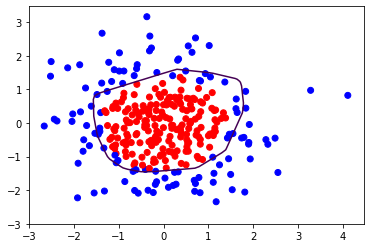

In [61]:

for x_predict in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_predict], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)

# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子
probs = np.array(probs).reshape(xx.shape)
plt.scatter(x1, x2, color=np.squeeze(Y_c))
# 把坐标xx yy和对应的值probs放入contour<[‘kɑntʊr]>函数，给probs值为0.5的所有点上色  plt点show后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

# 读入红蓝点，画出分割线，包含正则化
# 不清楚的数据，建议print出来查看 

Epoch 0, loss: 0.2821310982108116
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459614023566246
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570250183343887
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028400212526321
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.19942265003919601
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.18873638287186623
Test_acc: 0.5
--------------------------
Epoch 6, loss: 0.17851299419999123
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.16922875493764877
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16107673197984695
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15404684096574783
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14802725985646248
Test_acc: 0.5333333333333333
--------------------------
Epoch 11,

Epoch 95, loss: 0.07106082048267126
Test_acc: 0.8
--------------------------
Epoch 96, loss: 0.07072803843766451
Test_acc: 0.8
--------------------------
Epoch 97, loss: 0.07039883732795715
Test_acc: 0.8
--------------------------
Epoch 98, loss: 0.07007318176329136
Test_acc: 0.8333333333333334
--------------------------
Epoch 99, loss: 0.0697510102763772
Test_acc: 0.8666666666666667
--------------------------
Epoch 100, loss: 0.06943229492753744
Test_acc: 0.8666666666666667
--------------------------
Epoch 101, loss: 0.06911696959286928
Test_acc: 0.8666666666666667
--------------------------
Epoch 102, loss: 0.06880500260740519
Test_acc: 0.8666666666666667
--------------------------
Epoch 103, loss: 0.068496348336339
Test_acc: 0.8666666666666667
--------------------------
Epoch 104, loss: 0.06819095741957426
Test_acc: 0.8666666666666667
--------------------------
Epoch 105, loss: 0.06788879353553057
Test_acc: 0.8666666666666667
--------------------------
Epoch 106, loss: 0.06758981756

Epoch 187, loss: 0.051001012325286865
Test_acc: 1.0
--------------------------
Epoch 188, loss: 0.0508629409596324
Test_acc: 1.0
--------------------------
Epoch 189, loss: 0.05072600767016411
Test_acc: 1.0
--------------------------
Epoch 190, loss: 0.05059019848704338
Test_acc: 1.0
--------------------------
Epoch 191, loss: 0.05045548640191555
Test_acc: 1.0
--------------------------
Epoch 192, loss: 0.050321875140070915
Test_acc: 1.0
--------------------------
Epoch 193, loss: 0.05018933489918709
Test_acc: 1.0
--------------------------
Epoch 194, loss: 0.05005786381661892
Test_acc: 1.0
--------------------------
Epoch 195, loss: 0.04992745537310839
Test_acc: 1.0
--------------------------
Epoch 196, loss: 0.04979807883501053
Test_acc: 1.0
--------------------------
Epoch 197, loss: 0.04966974165290594
Test_acc: 1.0
--------------------------
Epoch 198, loss: 0.04954242426902056
Test_acc: 1.0
--------------------------
Epoch 199, loss: 0.04941611457616091
Test_acc: 1.0
------------

Epoch 297, loss: 0.040562248788774014
Test_acc: 1.0
--------------------------
Epoch 298, loss: 0.04049769788980484
Test_acc: 1.0
--------------------------
Epoch 299, loss: 0.04043351951986551
Test_acc: 1.0
--------------------------
Epoch 300, loss: 0.04036970995366573
Test_acc: 1.0
--------------------------
Epoch 301, loss: 0.040306271985173225
Test_acc: 1.0
--------------------------
Epoch 302, loss: 0.04024319350719452
Test_acc: 1.0
--------------------------
Epoch 303, loss: 0.04018046986311674
Test_acc: 1.0
--------------------------
Epoch 304, loss: 0.040118103846907616
Test_acc: 1.0
--------------------------
Epoch 305, loss: 0.04005609406158328
Test_acc: 1.0
--------------------------
Epoch 306, loss: 0.03999443957582116
Test_acc: 1.0
--------------------------
Epoch 307, loss: 0.03993312222883105
Test_acc: 1.0
--------------------------
Epoch 308, loss: 0.039872155059129
Test_acc: 1.0
--------------------------
Epoch 309, loss: 0.03981153108179569
Test_acc: 1.0
------------

Epoch 409, loss: 0.035086496733129025
Test_acc: 1.0
--------------------------
Epoch 410, loss: 0.03504961961880326
Test_acc: 1.0
--------------------------
Epoch 411, loss: 0.03501288779079914
Test_acc: 1.0
--------------------------
Epoch 412, loss: 0.03497632406651974
Test_acc: 1.0
--------------------------
Epoch 413, loss: 0.034939910750836134
Test_acc: 1.0
--------------------------
Epoch 414, loss: 0.034903660882264376
Test_acc: 1.0
--------------------------
Epoch 415, loss: 0.03486755723133683
Test_acc: 1.0
--------------------------
Epoch 416, loss: 0.034831615164875984
Test_acc: 1.0
--------------------------
Epoch 417, loss: 0.03479582257568836
Test_acc: 1.0
--------------------------
Epoch 418, loss: 0.034760179463773966
Test_acc: 1.0
--------------------------
Epoch 419, loss: 0.03472469002008438
Test_acc: 1.0
--------------------------
Epoch 420, loss: 0.034689351450651884
Test_acc: 1.0
--------------------------
Epoch 421, loss: 0.03465416468679905
Test_acc: 1.0
-------

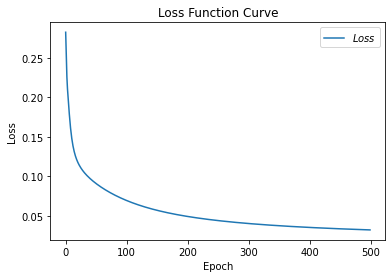

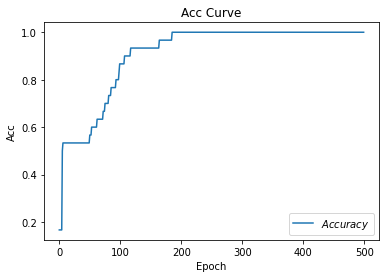

In [62]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 本文件较 class1\p45_iris.py 仅添加四处时间记录  用 ##n## 标识
# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况


Epoch 0, loss: 0.2961867228150368
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.28081151843070984
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.26392312347888947
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.2419254034757614
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.2185598500072956
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.20465286448597908
Test_acc: 0.16666666666666666
--------------------------
Epoch 6, loss: 0.1955692060291767
Test_acc: 0.16666666666666666
--------------------------
Epoch 7, loss: 0.18339980766177177
Test_acc: 0.5
--------------------------
Epoch 8, loss: 0.17289478331804276
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.1638195775449276
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.1557205766439438
Test_acc: 0.5333333333333333
--------------------------
Epoch 11, lo

Epoch 93, loss: 0.06799995619803667
Test_acc: 0.9666666666666667
--------------------------
Epoch 94, loss: 0.06767507176846266
Test_acc: 0.9666666666666667
--------------------------
Epoch 95, loss: 0.06735390797257423
Test_acc: 0.9666666666666667
--------------------------
Epoch 96, loss: 0.06703640427440405
Test_acc: 0.9666666666666667
--------------------------
Epoch 97, loss: 0.06672250758856535
Test_acc: 0.9666666666666667
--------------------------
Epoch 98, loss: 0.06641215737909079
Test_acc: 0.9666666666666667
--------------------------
Epoch 99, loss: 0.0661053080111742
Test_acc: 0.9666666666666667
--------------------------
Epoch 100, loss: 0.06580189801752567
Test_acc: 0.9666666666666667
--------------------------
Epoch 101, loss: 0.0655018799006939
Test_acc: 1.0
--------------------------
Epoch 102, loss: 0.06520519778132439
Test_acc: 1.0
--------------------------
Epoch 103, loss: 0.06491181533783674
Test_acc: 1.0
--------------------------
Epoch 104, loss: 0.064621677622

Epoch 201, loss: 0.046666319482028484
Test_acc: 1.0
--------------------------
Epoch 202, loss: 0.04654979985207319
Test_acc: 1.0
--------------------------
Epoch 203, loss: 0.046434177085757256
Test_acc: 1.0
--------------------------
Epoch 204, loss: 0.0463194502517581
Test_acc: 1.0
--------------------------
Epoch 205, loss: 0.046205601654946804
Test_acc: 1.0
--------------------------
Epoch 206, loss: 0.04609262477606535
Test_acc: 1.0
--------------------------
Epoch 207, loss: 0.045980505645275116
Test_acc: 1.0
--------------------------
Epoch 208, loss: 0.04586923401802778
Test_acc: 1.0
--------------------------
Epoch 209, loss: 0.045758819207549095
Test_acc: 1.0
--------------------------
Epoch 210, loss: 0.04564923048019409
Test_acc: 1.0
--------------------------
Epoch 211, loss: 0.04554046783596277
Test_acc: 1.0
--------------------------
Epoch 212, loss: 0.04543251916766167
Test_acc: 1.0
--------------------------
Epoch 213, loss: 0.04532537516206503
Test_acc: 1.0
---------

Epoch 310, loss: 0.03773943800479174
Test_acc: 1.0
--------------------------
Epoch 311, loss: 0.03768237493932247
Test_acc: 1.0
--------------------------
Epoch 312, loss: 0.037625623401254416
Test_acc: 1.0
--------------------------
Epoch 313, loss: 0.03756918711587787
Test_acc: 1.0
--------------------------
Epoch 314, loss: 0.037513060960918665
Test_acc: 1.0
--------------------------
Epoch 315, loss: 0.03745723515748978
Test_acc: 1.0
--------------------------
Epoch 316, loss: 0.03740171808749437
Test_acc: 1.0
--------------------------
Epoch 317, loss: 0.037346504628658295
Test_acc: 1.0
--------------------------
Epoch 318, loss: 0.03729158826172352
Test_acc: 1.0
--------------------------
Epoch 319, loss: 0.03723696805536747
Test_acc: 1.0
--------------------------
Epoch 320, loss: 0.03718263888731599
Test_acc: 1.0
--------------------------
Epoch 321, loss: 0.03712860634550452
Test_acc: 1.0
--------------------------
Epoch 322, loss: 0.03707486670464277
Test_acc: 1.0
----------

Epoch 417, loss: 0.03301468072459102
Test_acc: 1.0
--------------------------
Epoch 418, loss: 0.032980648800730705
Test_acc: 1.0
--------------------------
Epoch 419, loss: 0.032946758437901735
Test_acc: 1.0
--------------------------
Epoch 420, loss: 0.032913010101765394
Test_acc: 1.0
--------------------------
Epoch 421, loss: 0.03287941077724099
Test_acc: 1.0
--------------------------
Epoch 422, loss: 0.032845946960151196
Test_acc: 1.0
--------------------------
Epoch 423, loss: 0.03281261911615729
Test_acc: 1.0
--------------------------
Epoch 424, loss: 0.03277944214642048
Test_acc: 1.0
--------------------------
Epoch 425, loss: 0.0327463923022151
Test_acc: 1.0
--------------------------
Epoch 426, loss: 0.03271348727867007
Test_acc: 1.0
--------------------------
Epoch 427, loss: 0.032680710311979055
Test_acc: 1.0
--------------------------
Epoch 428, loss: 0.03264807444065809
Test_acc: 1.0
--------------------------
Epoch 429, loss: 0.03261556616052985
Test_acc: 1.0
---------

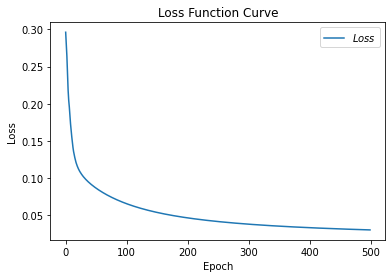

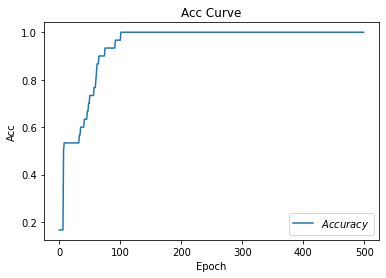

In [63]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
m_w, m_b = 0, 0
beta = 0.9
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        ##########################################################################
        # sgd-momentun  
        m_w = beta * m_w + (1 - beta) * grads[0]
        m_b = beta * m_b + (1 - beta) * grads[1]
        w1.assign_sub(lr * m_w)
        b1.assign_sub(lr * m_b)
    ##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况


Epoch 0, loss: 0.3926013857126236
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.20467261411249638
Test_acc: 0.5333333333333333
--------------------------
Epoch 2, loss: 0.17201939597725868
Test_acc: 0.5333333333333333
--------------------------
Epoch 3, loss: 0.15918194875121117
Test_acc: 0.5333333333333333
--------------------------
Epoch 4, loss: 0.15706614404916763
Test_acc: 0.5333333333333333
--------------------------
Epoch 5, loss: 0.21816574037075043
Test_acc: 0.5333333333333333
--------------------------
Epoch 6, loss: 0.14377842098474503
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.175712738186121
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.18757154047489166
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.19608472101390362
Test_acc: 0.8333333333333334
--------------------------
Epoch 10, loss: 0.09835131280124187
Test_acc: 0.8333333333333334
--------------------------


Epoch 103, loss: 0.03910341626033187
Test_acc: 1.0
--------------------------
Epoch 104, loss: 0.038807373493909836
Test_acc: 1.0
--------------------------
Epoch 105, loss: 0.03851672541350126
Test_acc: 1.0
--------------------------
Epoch 106, loss: 0.03823128994554281
Test_acc: 1.0
--------------------------
Epoch 107, loss: 0.037950919941067696
Test_acc: 1.0
--------------------------
Epoch 108, loss: 0.03767540492117405
Test_acc: 1.0
--------------------------
Epoch 109, loss: 0.037404711823910475
Test_acc: 1.0
--------------------------
Epoch 110, loss: 0.03713862085714936
Test_acc: 1.0
--------------------------
Epoch 111, loss: 0.0368770444765687
Test_acc: 1.0
--------------------------
Epoch 112, loss: 0.036619946360588074
Test_acc: 1.0
--------------------------
Epoch 113, loss: 0.03636711277067661
Test_acc: 1.0
--------------------------
Epoch 114, loss: 0.03611843567341566
Test_acc: 1.0
--------------------------
Epoch 115, loss: 0.03587393742054701
Test_acc: 1.0
----------

Epoch 211, loss: 0.029407549474854022
Test_acc: 1.0
--------------------------
Epoch 212, loss: 0.02941185235977173
Test_acc: 1.0
--------------------------
Epoch 213, loss: 0.029414930671919137
Test_acc: 1.0
--------------------------
Epoch 214, loss: 0.029416835925076157
Test_acc: 1.0
--------------------------
Epoch 215, loss: 0.029417784593533725
Test_acc: 1.0
--------------------------
Epoch 216, loss: 0.029417753510642797
Test_acc: 1.0
--------------------------
Epoch 217, loss: 0.029416916717309505
Test_acc: 1.0
--------------------------
Epoch 218, loss: 0.029415257507935166
Test_acc: 1.0
--------------------------
Epoch 219, loss: 0.02941283449763432
Test_acc: 1.0
--------------------------
Epoch 220, loss: 0.029409810551442206
Test_acc: 1.0
--------------------------
Epoch 221, loss: 0.029406092304270715
Test_acc: 1.0
--------------------------
Epoch 222, loss: 0.029401879641227424
Test_acc: 1.0
--------------------------
Epoch 223, loss: 0.029397130478173494
Test_acc: 1.0
--

Test_acc: 1.0
--------------------------
Epoch 317, loss: 0.028645788959693164
Test_acc: 1.0
--------------------------
Epoch 318, loss: 0.028640303586144
Test_acc: 1.0
--------------------------
Epoch 319, loss: 0.02863487630384043
Test_acc: 1.0
--------------------------
Epoch 320, loss: 0.028629534237552434
Test_acc: 1.0
--------------------------
Epoch 321, loss: 0.028624211146961898
Test_acc: 1.0
--------------------------
Epoch 322, loss: 0.028618985845241696
Test_acc: 1.0
--------------------------
Epoch 323, loss: 0.028613795817364007
Test_acc: 1.0
--------------------------
Epoch 324, loss: 0.02860864991089329
Test_acc: 1.0
--------------------------
Epoch 325, loss: 0.02860358712496236
Test_acc: 1.0
--------------------------
Epoch 326, loss: 0.02859855449059978
Test_acc: 1.0
--------------------------
Epoch 327, loss: 0.02859356888802722
Test_acc: 1.0
--------------------------
Epoch 328, loss: 0.028588670305907726
Test_acc: 1.0
--------------------------
Epoch 329, loss: 0.

Test_acc: 0.36666666666666664
--------------------------
Epoch 422, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 423, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 424, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 425, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 426, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 427, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 428, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 429, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 430, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 431, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 432, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 433, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 4

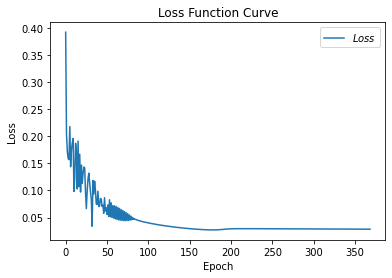

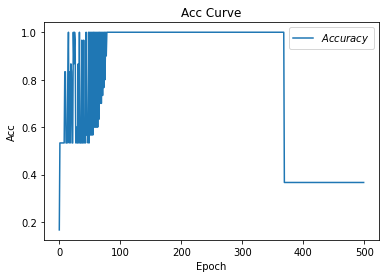

In [64]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
v_w, v_b = 0, 0
beta = 0.9
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        ##########################################################################
        # rmsprop
        v_w = beta * v_w + (1 - beta) * tf.square(grads[0])
        v_b = beta * v_b + (1 - beta) * tf.square(grads[1])
        w1.assign_sub(lr * grads[0] / tf.sqrt(v_w))
        b1.assign_sub(lr * grads[1] / tf.sqrt(v_b))
    ##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况
